# Load all the data from the input files
1. Training Dataset : Merge the quantitative, categorical metadata files & solution data
2. Training Dataset : Merge the quantitative, categorical metadata files

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import os

# Set base directory for data
BASE_DIR = r"C:\Users\Maab\Desktop\ADHD_Kaggle_Competition\Repo\WiDS-Datathon-2025\Data\raw"

# Function to load all data
def get_feats(mode='TRAIN'):
    """
    Loads and merges the relevant datasets based on the mode ('TRAIN' or 'TEST').
    """

    # Define folder path based on mode
    folder = os.path.join(BASE_DIR, "TRAIN_NEW" if mode == 'TRAIN' else "TEST")

    # Load quantitative metadata
    feats = pd.read_excel(os.path.join(folder, f"{mode}_QUANTITATIVE_METADATA_new.xlsx" if mode == 'TRAIN' else f"{mode}_QUANTITATIVE_METADATA.xlsx"))

    # Load categorical metadata
    if mode == 'TRAIN':
        cate = pd.read_excel(os.path.join(folder, "TRAIN_CATEGORICAL_METADATA_new.xlsx"))
    else:
        cate = pd.read_excel(os.path.join(folder, "TEST_CATEGORICAL.xlsx"))

    # Merge categorical data
    feats = feats.merge(cate, on='participant_id', how='left')

    # Load functional connectome matrices
    func_filename = "TRAIN_FUNCTIONAL_CONNECTOME_MATRICES_new_36P_Pearson.csv" if mode == 'TRAIN' else "TEST_FUNCTIONAL_CONNECTOME_MATRICES.csv"
    func = pd.read_csv(os.path.join(folder, func_filename))

    # Merge functional data
    feats = feats.merge(func, on='participant_id', how='left')

    # If training data, merge with solution file
    if mode == 'TRAIN':
        solution_path = os.path.join(folder, "TRAINING_SOLUTIONS.xlsx")
        solution = pd.read_excel(solution_path)
        feats = feats.merge(solution, on='participant_id', how='left')

    return feats


In [3]:
#Load data
train = get_feats(mode='TRAIN')
test = get_feats(mode='TEST')

sub = pd.read_excel(os.path.join(BASE_DIR, 'SAMPLE_SUBMISSION.xlsx'))
y = pd.read_excel(os.path.join(BASE_DIR, "TRAIN_NEW\TRAINING_SOLUTIONS.xlsx"))


# Set index
train.set_index('participant_id', inplace=True)
test.set_index('participant_id', inplace=True)

# Define targets and features
targets = ['ADHD_Outcome', 'Sex_F']

non_connectome_features = [
    feature for feature in train.columns 
    if 'throw' not in feature and feature not in targets
]

connectome_features = [feature for feature in train.columns if 'throw' in feature]

In [6]:
print(non_connectome_features)
print(connectome_features)
print(len(non_connectome_features))
print(len(connectome_features))
print(len(non_connectome_features)+len(connectome_features))

['EHQ_EHQ_Total', 'ColorVision_CV_Score', 'APQ_P_APQ_P_CP', 'APQ_P_APQ_P_ID', 'APQ_P_APQ_P_INV', 'APQ_P_APQ_P_OPD', 'APQ_P_APQ_P_PM', 'APQ_P_APQ_P_PP', 'SDQ_SDQ_Conduct_Problems', 'SDQ_SDQ_Difficulties_Total', 'SDQ_SDQ_Emotional_Problems', 'SDQ_SDQ_Externalizing', 'SDQ_SDQ_Generating_Impact', 'SDQ_SDQ_Hyperactivity', 'SDQ_SDQ_Internalizing', 'SDQ_SDQ_Peer_Problems', 'SDQ_SDQ_Prosocial', 'MRI_Track_Age_at_Scan', 'Basic_Demos_Enroll_Year', 'Basic_Demos_Study_Site', 'PreInt_Demos_Fam_Child_Ethnicity', 'PreInt_Demos_Fam_Child_Race', 'MRI_Track_Scan_Location', 'Barratt_Barratt_P1_Edu', 'Barratt_Barratt_P1_Occ', 'Barratt_Barratt_P2_Edu', 'Barratt_Barratt_P2_Occ']
['0throw_1thcolumn', '0throw_2thcolumn', '0throw_3thcolumn', '0throw_4thcolumn', '0throw_5thcolumn', '0throw_6thcolumn', '0throw_7thcolumn', '0throw_8thcolumn', '0throw_9thcolumn', '0throw_10thcolumn', '0throw_11thcolumn', '0throw_12thcolumn', '0throw_13thcolumn', '0throw_14thcolumn', '0throw_15thcolumn', '0throw_16thcolumn', '0thro

In [6]:
print(train.shape) 
print(test.shape)

(1213, 19929)
(304, 19927)


# MISSING VALUES

### Check train set for missing values

In [4]:
# Check for missing values in the training data
missing = train.isnull().sum()
missing_percent = 100 * missing / len(train)
missing_df = pd.DataFrame({
    'Missing Values': missing,
    'Percentage': missing_percent
})


# Display features with missing values
missing_features = missing_df[missing_df['Missing Values'] > 0].sort_values('Percentage', ascending=False)
print("\nFeatures with missing values in training data:")
missing_features



Features with missing values in training data:


,Missing Values,Percentage
MRI_Track_Age_at_Scan,360,29.678483
Barratt_Barratt_P2_Occ,222,18.301731
Barratt_Barratt_P2_Edu,198,16.323166
PreInt_Demos_Fam_Child_Race,54,4.451772
PreInt_Demos_Fam_Child_Ethnicity,43,3.544930
Barratt_Barratt_P1_Occ,31,2.555647
ColorVision_CV_Score,23,1.896125
Barratt_Barratt_P1_Edu,15,1.236603
EHQ_EHQ_Total,13,1.071723
APQ_P_APQ_P_PP,12,0.989283


In [41]:
columns_with_missing = missing_features.index.tolist()
print(columns_with_missing)

['MRI_Track_Age_at_Scan', 'Barratt_Barratt_P2_Occ', 'Barratt_Barratt_P2_Edu', 'PreInt_Demos_Fam_Child_Race', 'PreInt_Demos_Fam_Child_Ethnicity', 'Barratt_Barratt_P1_Occ', 'ColorVision_CV_Score', 'Barratt_Barratt_P1_Edu', 'EHQ_EHQ_Total', 'APQ_P_APQ_P_PP', 'APQ_P_APQ_P_PM', 'APQ_P_APQ_P_OPD', 'APQ_P_APQ_P_INV', 'APQ_P_APQ_P_ID', 'APQ_P_APQ_P_CP', 'SDQ_SDQ_Difficulties_Total', 'SDQ_SDQ_Emotional_Problems', 'SDQ_SDQ_Externalizing', 'SDQ_SDQ_Conduct_Problems', 'SDQ_SDQ_Hyperactivity', 'SDQ_SDQ_Internalizing', 'SDQ_SDQ_Peer_Problems', 'SDQ_SDQ_Prosocial', 'SDQ_SDQ_Generating_Impact', 'MRI_Track_Scan_Location']


### Impute train set for missing values

In [5]:
#Import the imputer
from sklearn.impute import SimpleImputer

# Categorical columns - we'll use the most common value to fill in missing data
categorical_columns = [
    "MRI_Track_Scan_Location",
    "Barratt_Barratt_P2_Occ",
    "Barratt_Barratt_P2_Edu",
    "PreInt_Demos_Fam_Child_Race",
    "PreInt_Demos_Fam_Child_Ethnicity",
    "Barratt_Barratt_P1_Occ",
    "Barratt_Barratt_P1_Edu"
]

# Numerical columns - we'll use the average value to fill in missing data
numerical_columns = [
    "MRI_Track_Age_at_Scan",
    "ColorVision_CV_Score",
    "EHQ_EHQ_Total",
    "APQ_P_APQ_P_PP",
    "APQ_P_APQ_P_PM",
    "APQ_P_APQ_P_OPD",
    "APQ_P_APQ_P_INV",
    "APQ_P_APQ_P_ID",
    "APQ_P_APQ_P_CP",
    "SDQ_SDQ_Difficulties_Total",
    "SDQ_SDQ_Emotional_Problems",
    "SDQ_SDQ_Externalizing",
    "SDQ_SDQ_Conduct_Problems",
    "SDQ_SDQ_Hyperactivity",
    "SDQ_SDQ_Internalizing",
    "SDQ_SDQ_Peer_Problems",
    "SDQ_SDQ_Prosocial",
    "SDQ_SDQ_Generating_Impact"
]


mode_imputer = SimpleImputer(strategy='most_frequent')  # For categorical data
mean_imputer = SimpleImputer(strategy='mean')           # For numerical data


print("Filling in missing categorical data with most common values...")
mode_imputer.fit(train[categorical_columns])  
train[categorical_columns] = mode_imputer.transform(train[categorical_columns])


print("Filling in missing numerical data with average values...")
mean_imputer.fit(train[numerical_columns])  
train[numerical_columns] = mean_imputer.transform(train[numerical_columns])

print("Done! All missing values have been filled in.")

Filling in missing categorical data with most common values...
Filling in missing numerical data with average values...
Done! All missing values have been filled in.


In [6]:
# Check for missing values in the training data
missing = train.isnull().sum()
missing_percent = 100 * missing / len(train)
missing_df = pd.DataFrame({
    'Missing Values': missing,
    'Percentage': missing_percent
})


# Display features with missing values
missing_features = missing_df[missing_df['Missing Values'] > 0].sort_values('Percentage', ascending=False)
print("\nFeatures with missing values in training data:")
missing_features



Features with missing values in training data:


,Missing Values,Percentage


In [33]:
# #Import the imputer
# from sklearn.impute import SimpleImputer

# #Get the list of columns that gave missing values
# columns_with_missing = missing_features.index.tolist()
# print(f"Number of columns with missing values: {len(columns_with_missing)}")

# #Create an imputer that will replace missing values with the mean of each column
# imputer = SimpleImputer(strategy = 'mean')

# #Apply the imputer only to the columns that have missing values
# train[columns_with_missing] = imputer.fit_transform(train[columns_with_missing])

# # #Do the same for the test set if needed
# # test[columns_with_missing] = imputer.transform(test[columns_with_missing])

# #Verify that missing values have been filled
# missing_after = train[columns_with_missing].isnull().sum().sum()
# print(f"Missing values after imputation: {missing_after}")
# print("All missing values have been replaced with column means")

In [ ]:
# # Define the list of columns you want to describe
# selected_columns = [
#     "MRI_Track_Age_at_Scan",
#     "MRI_Track_Scan_Location",
#     "Barratt_Barratt_P2_Occ",
#     "Barratt_Barratt_P2_Edu",
#     "PreInt_Demos_Fam_Child_Race",
#     "PreInt_Demos_Fam_Child_Ethnicity",
#     "Barratt_Barratt_P1_Occ",
#     "ColorVision_CV_Score",
#     "Barratt_Barratt_P1_Edu",
#     "EHQ_EHQ_Total",
#     "APQ_P_APQ_P_PP",
#     "APQ_P_APQ_P_PM",
#     "APQ_P_APQ_P_OPD",
#     "APQ_P_APQ_P_INV",
#     "APQ_P_APQ_P_ID",
#     "APQ_P_APQ_P_CP",
#     "SDQ_SDQ_Difficulties_Total",
#     "SDQ_SDQ_Emotional_Problems",
#     "SDQ_SDQ_Externalizing",
#     "SDQ_SDQ_Conduct_Problems",
#     "SDQ_SDQ_Hyperactivity",
#     "SDQ_SDQ_Internalizing",
#     "SDQ_SDQ_Peer_Problems",
#     "SDQ_SDQ_Prosocial",
#     "SDQ_SDQ_Generating_Impact"
# ]

# # Apply describe() to only these columns
# test[selected_columns].describe()
# test.describe()[selected_columns]

### Check test set for missing values

In [7]:
# Check for missing values in the testing data
missing = test.isnull().sum()
missing_percent = 100 * missing / len(test)
missing_df = pd.DataFrame({
    'Missing Values': missing,
    'Percentage': missing_percent
})


# Display features with missing values
missing_features = missing_df[missing_df['Missing Values'] > 0].sort_values('Percentage', ascending=False)
print("\nFeatures with missing values in testing data:")
missing_features



Features with missing values in testing data:


,Missing Values,Percentage
Barratt_Barratt_P2_Occ,42,13.815789
Barratt_Barratt_P2_Edu,36,11.842105
SDQ_SDQ_Difficulties_Total,30,9.868421
SDQ_SDQ_Prosocial,30,9.868421
SDQ_SDQ_Peer_Problems,30,9.868421
SDQ_SDQ_Internalizing,30,9.868421
SDQ_SDQ_Hyperactivity,30,9.868421
SDQ_SDQ_Generating_Impact,30,9.868421
SDQ_SDQ_Emotional_Problems,30,9.868421
SDQ_SDQ_Externalizing,30,9.868421


### Impute test set for missing values

In [9]:
#Import the imputer
from sklearn.impute import SimpleImputer

# Categorical columns - we'll use the most common value to fill in missing data
categorical_columns = [
    "Barratt_Barratt_P2_Occ",
    "Barratt_Barratt_P2_Edu",
    "PreInt_Demos_Fam_Child_Race",
    "PreInt_Demos_Fam_Child_Ethnicity",
    "Barratt_Barratt_P1_Edu",
    "Barratt_Barratt_P1_Occ"
]

# Numerical columns - we'll use the average value to fill in missing data
numerical_columns = [
    "SDQ_SDQ_Difficulties_Total",
    "SDQ_SDQ_Prosocial",
    "SDQ_SDQ_Peer_Problems",
    "SDQ_SDQ_Internalizing",
    "SDQ_SDQ_Hyperactivity",
    "SDQ_SDQ_Generating_Impact",
    "SDQ_SDQ_Emotional_Problems",
    "SDQ_SDQ_Externalizing",
    "SDQ_SDQ_Conduct_Problems",
    "APQ_P_APQ_P_PP",
    "APQ_P_APQ_P_PM",
    "APQ_P_APQ_P_OPD",
    "APQ_P_APQ_P_INV",
    "APQ_P_APQ_P_ID",
    "APQ_P_APQ_P_CP",
    "ColorVision_CV_Score",
    "EHQ_EHQ_Total"
]


mode_imputer = SimpleImputer(strategy='most_frequent')  # For categorical data
mean_imputer = SimpleImputer(strategy='mean')           # For numerical data


print("Filling in missing categorical data with most common values...")
mode_imputer.fit(test[categorical_columns])  
test[categorical_columns] = mode_imputer.transform(test[categorical_columns])


print("Filling in missing numerical data with average values...")
mean_imputer.fit(test[numerical_columns])  
test[numerical_columns] = mean_imputer.transform(test[numerical_columns])

print("Done! All missing values have been filled in.")

Filling in missing categorical data with most common values...
Filling in missing numerical data with average values...
Done! All missing values have been filled in.


In [10]:
# Check for missing values in the testing data
missing = test.isnull().sum()
missing_percent = 100 * missing / len(test)
missing_df = pd.DataFrame({
    'Missing Values': missing,
    'Percentage': missing_percent
})


# Display features with missing values
missing_features = missing_df[missing_df['Missing Values'] > 0].sort_values('Percentage', ascending=False)
print("\nFeatures with missing values in testing data:")
missing_features



Features with missing values in testing data:


,Missing Values,Percentage


# MODELING

In [60]:
print(train.shape, test.shape, y.shape)
print(train.isnull().sum().sum())
print(test.isnull().sum().sum())
print(train.dtypes.value_counts())
print(y.head())
print(y.value_counts())

(1213, 19929) (304, 19927) (1213, 3)
0
0
float64    19925
int64          4
Name: count, dtype: int64
  participant_id  ADHD_Outcome  Sex_F
0   UmrK0vMLopoR             1      1
1   CPaeQkhcjg7d             1      0
2   Nb4EetVPm3gs             1      0
3   p4vPhVu91o4b             1      1
4   M09PXs7arQ5E             1      1
participant_id  ADHD_Outcome  Sex_F
00aIpNTbG5uh    1             0        1
gBFdKiRllu4B    1             0        1
fxW28SwnU34E    0             0        1
fxUaUlsegWbI    1             0        1
fuApQJV2wS24    1             1        1
                                      ..
Kq6tM8sj7Ohi    1             1        1
KomJH1xW6wsy    1             1        1
KewFB4GN3Fcy    1             1        1
KMvO1PRzBE6A    1             1        1
zwjJWCRzKhDz    0             1        1
Name: count, Length: 1213, dtype: int64


In [61]:
train_cols = set(train.columns)
test_cols = set(test.columns)

missing_in_test = train_cols - test_cols
missing_in_train = test_cols - train_cols

print("Missing in test:", missing_in_test)
print("Missing in train:", missing_in_train)


Missing in test: {'ADHD_Outcome', 'Sex_F'}
Missing in train: set()


In [11]:
##removing columns from train that is not in test
y_ADHD = train['ADHD_Outcome']
y_Sex = train['Sex_F']

train.drop(columns=['ADHD_Outcome', 'Sex_F'], inplace=True)

In [63]:
print(train.shape, test.shape, y_ADHD.shape, y_Sex.shape)

(1213, 19927) (304, 19927) (1213,) (1213,)



🚨 **Problem:** The model is evaluated **only once** on the test set, making the result unreliable.

---

## 2️⃣ K-Fold Cross-Validation

🔹 The dataset is split into **K folds**.  
🔹 Each fold gets a chance to be the **validation set once**, and the model is trained on the rest.  
🔹 At the end, we take the **average model performance** across all K folds.



Fold 1: 🟦🟦🟦🟦🟦🟦🟦🟦🟦🟥 Fold 2: 🟦🟦🟦🟦🟦🟦🟦🟦🟥🟦 Fold 3: 🟦🟦🟦🟦🟦🟦🟦🟥🟦🟦 Fold 4: 🟦🟦🟦🟦🟦🟦🟥🟦🟦🟦 Fold 5: 🟦🟦🟦🟦🟦🟥🟦🟦🟦🟦


✅ Ensures every sample appears **in validation once** and **in training multiple times**.  
✅ More **reliable evaluation** compared to a single train-test split.  

---



In [64]:
print(train.shape, test.shape, y_ADHD.shape, y_Sex.shape)

(1213, 19927) (304, 19927) (1213,) (1213,)


In [65]:
print("Each train datasets in each fold",1213/10)
print("Total train dataset in each fold",(1213/10)*9)

Each train datasets in each fold 121.3
Total train dataset in each fold 1091.7


In [66]:
from sklearn.model_selection import KFold

kf = KFold(n_splits=10, shuffle=True, random_state=42)

for fold, (train_idx, val_idx) in enumerate(kf.split(train)):
    X_train, X_val = train.iloc[train_idx], train.iloc[val_idx]
    y_train_ADHD, y_val_ADHD = y_ADHD.iloc[train_idx], y_ADHD.iloc[val_idx]
    y_train_Sex, y_val_Sex = y_Sex.iloc[train_idx], y_Sex.iloc[val_idx]

    print(f'Fold {fold + 1}')
    print('X_train:', X_train.shape, 'X_val:', X_val.shape)

    # ADHD_Outcome distribution
    print('y_train: ADHD_Outcome')
    print(y_train_ADHD.value_counts(normalize=True))
    print('y_val: ADHD_Outcome')
    print(y_val_ADHD.value_counts(normalize=True))

    # Sex_F distribution
    print('y_train: Sex_F')
    print(y_train_Sex.value_counts(normalize=True))
    print('y_val: Sex_F')
    print(y_val_Sex.value_counts(normalize=True))

    print('-------------------------------------------\n')


Fold 1
X_train: (1091, 19927) X_val: (122, 19927)
y_train: ADHD_Outcome
ADHD_Outcome
1    0.684693
0    0.315307
Name: proportion, dtype: float64
y_val: ADHD_Outcome
ADHD_Outcome
1    0.688525
0    0.311475
Name: proportion, dtype: float64
y_train: Sex_F
Sex_F
0    0.653529
1    0.346471
Name: proportion, dtype: float64
y_val: Sex_F
Sex_F
0    0.688525
1    0.311475
Name: proportion, dtype: float64
-------------------------------------------

Fold 2
X_train: (1091, 19927) X_val: (122, 19927)
y_train: ADHD_Outcome
ADHD_Outcome
1    0.686526
0    0.313474
Name: proportion, dtype: float64
y_val: ADHD_Outcome
ADHD_Outcome
1    0.672131
0    0.327869
Name: proportion, dtype: float64
y_train: Sex_F
Sex_F
0    0.652612
1    0.347388
Name: proportion, dtype: float64
y_val: Sex_F
Sex_F
0    0.696721
1    0.303279
Name: proportion, dtype: float64
-------------------------------------------

Fold 3
X_train: (1091, 19927) X_val: (122, 19927)
y_train: ADHD_Outcome
ADHD_Outcome
1    0.690192
0    0.

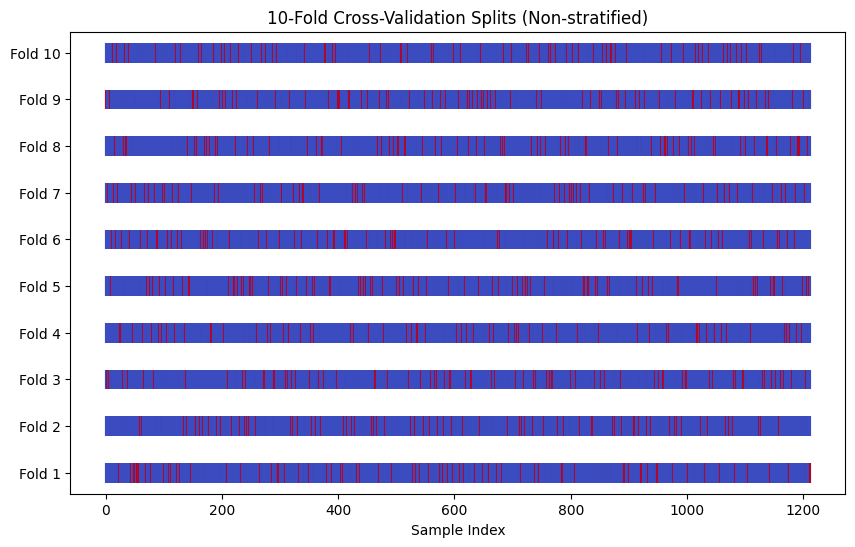

In [148]:
from sklearn.model_selection import KFold
import matplotlib.pyplot as plt
import numpy as np

kf = KFold(n_splits=10, shuffle=True, random_state=42)

plt.figure(figsize=(10, 6))

for fold, (train_idx, val_idx) in enumerate(kf.split(train)):
    fold_assignments = np.full(len(train), np.nan)
    fold_assignments[train_idx] = 0
    fold_assignments[val_idx] = 1
    
    plt.scatter(range(len(fold_assignments)), 
                [fold]*len(fold_assignments),
                c=fold_assignments, cmap='coolwarm', marker='|', s=200)

plt.yticks(range(10), [f'Fold {i+1}' for i in range(10)])
plt.xlabel('Sample Index')
plt.title('10-Fold Cross-Validation Splits (Non-stratified)')
plt.show()


## 3️⃣ Stratified K-Fold Cross-Validation

🔹 **Standard K-Fold** may lead to **imbalanced validation sets** if data is skewed.  
🔹 **Stratified K-Fold** ensures **each fold has the same class distribution** as the whole dataset.

### ⚠️ **Without Stratification (Problematic for Imbalanced Data)**



Fold 1: 🟩🟩🟩🟩🟩🟩🟩🟩🟩🟥 Fold 2: 🟩🟩🟩🟩🟩🟩🟩🟥🟩🟩 Fold 3: 🟩🟩🟩🟩🟩🟩🟥🟩🟩🟩 Fold 4: 🟩🟩🟩🟩🟩🟥🟩🟩🟩🟩 Fold 5: 🟥🟩🟩🟩🟩🟩🟩🟩🟩🟩


✅ Ensures that **each fold maintains the same class balance** as the original dataset.  
✅ Best for **imbalanced classification problems** (like ADHD vs. non-ADHD in your case).  

---



In [12]:
from sklearn.model_selection import StratifiedKFold

# Use Stratified K-Fold on Sex_F (1 = Female, 0 = Male)
skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

for fold, (train_idx, val_idx) in enumerate(skf.split(train, y_Sex)):
    y_train_fold = y_Sex.iloc[train_idx]
    y_val_fold = y_Sex.iloc[val_idx]

    print(f"Stratified Fold {fold+1} - Training Class Distribution (Sex_F):")
    print(y_train_fold.value_counts(normalize=True).rename_axis('Sex_F').reset_index(name='Proportion'))
    print(f"Stratified Fold {fold+1} - Validation Class Distribution (Sex_F):")
    print(y_val_fold.value_counts(normalize=True).rename_axis('Sex_F').reset_index(name='Proportion'))
    print("-" * 50)


Stratified Fold 1 - Training Class Distribution (Sex_F):
   Sex_F  Proportion
0      0    0.657195
1      1    0.342805
Stratified Fold 1 - Validation Class Distribution (Sex_F):
   Sex_F  Proportion
0      0    0.655738
1      1    0.344262
--------------------------------------------------
Stratified Fold 2 - Training Class Distribution (Sex_F):
   Sex_F  Proportion
0      0    0.657195
1      1    0.342805
Stratified Fold 2 - Validation Class Distribution (Sex_F):
   Sex_F  Proportion
0      0    0.655738
1      1    0.344262
--------------------------------------------------
Stratified Fold 3 - Training Class Distribution (Sex_F):
   Sex_F  Proportion
0      0    0.657195
1      1    0.342805
Stratified Fold 3 - Validation Class Distribution (Sex_F):
   Sex_F  Proportion
0      0    0.655738
1      1    0.344262
--------------------------------------------------
Stratified Fold 4 - Training Class Distribution (Sex_F):
   Sex_F  Proportion
0      0    0.656593
1      1    0.343407
S

In [13]:
from sklearn.model_selection import StratifiedKFold

# Create a single categorical label by combining ADHD_Outcome & Sex_F
y_combined = y_ADHD.astype(str) + "_" + y_Sex.astype(str)  # Example: "1_0", "0_1"

skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

for fold, (train_idx, val_idx) in enumerate(skf.split(train, y_combined)):
    y_train_ADHD, y_train_Sex = y_ADHD.iloc[train_idx], y_Sex.iloc[train_idx]
    y_val_ADHD, y_val_Sex = y_ADHD.iloc[val_idx], y_Sex.iloc[val_idx]

    print(f"Stratified Fold {fold+1}")
    print("Training Class Distribution - ADHD_Outcome:")
    print(y_train_ADHD.value_counts(normalize=True))
    print("Validation Class Distribution - ADHD_Outcome:")
    print(y_val_ADHD.value_counts(normalize=True))
    
    print("Training Class Distribution - Sex_F:")
    print(y_train_Sex.value_counts(normalize=True))
    print("Validation Class Distribution - Sex_F:")
    print(y_val_Sex.value_counts(normalize=True))
    
    print("-" * 40)


Stratified Fold 1
Training Class Distribution - ADHD_Outcome:
ADHD_Outcome
1    0.684693
0    0.315307
Name: proportion, dtype: float64
Validation Class Distribution - ADHD_Outcome:
ADHD_Outcome
1    0.688525
0    0.311475
Name: proportion, dtype: float64
Training Class Distribution - Sex_F:
Sex_F
0    0.656279
1    0.343721
Name: proportion, dtype: float64
Validation Class Distribution - Sex_F:
Sex_F
0    0.663934
1    0.336066
Name: proportion, dtype: float64
----------------------------------------
Stratified Fold 2
Training Class Distribution - ADHD_Outcome:
ADHD_Outcome
1    0.68561
0    0.31439
Name: proportion, dtype: float64
Validation Class Distribution - ADHD_Outcome:
ADHD_Outcome
1    0.680328
0    0.319672
Name: proportion, dtype: float64
Training Class Distribution - Sex_F:
Sex_F
0    0.657195
1    0.342805
Name: proportion, dtype: float64
Validation Class Distribution - Sex_F:
Sex_F
0    0.655738
1    0.344262
Name: proportion, dtype: float64
-----------------------------

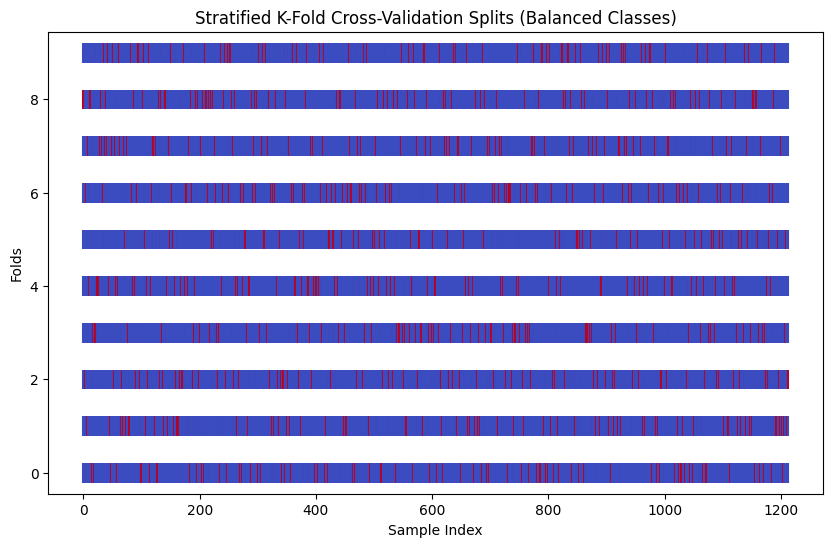

In [14]:
from sklearn.model_selection import StratifiedKFold

skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

plt.figure(figsize=(10, 6))

for fold, (train_idx, val_idx) in enumerate(skf.split(train, y_Sex)):
    fold_labels = np.full(len(y_Sex), np.nan)
    fold_labels[train_idx] = 0  # Training data
    fold_labels[val_idx] = 1  # Validation data

    plt.scatter(range(len(fold_labels)), [fold]*len(fold_labels),
                c=fold_labels, cmap='coolwarm', marker='|', s=200)

plt.xlabel("Sample Index")
plt.ylabel("Folds")
plt.title("Stratified K-Fold Cross-Validation Splits (Balanced Classes)")
plt.show()


## Summary: When to Use Which?

| Cross-Validation Type | When to Use? | Pros | Cons |
|-----------------------|-------------|------|------|
| **Holdout Validation** | When dataset is **very large** | Fast | Might not generalize well |
| **K-Fold** | When dataset is **small/medium** | Reliable & prevents overfitting | Slower |
| **Stratified K-Fold** | When **class imbalance** exists | Keeps class proportions balanced | Slightly slower |

---


### MODELING

In [72]:
# Scikit-learn libraries
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.linear_model import LogisticRegression
import lightgbm as lgb
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, make_scorer

# Optional: Uncomment if using more models
# from sklearn.svm import SVC
# from sklearn.neighbors import KNeighborsClassifier
# from sklearn.naive_bayes import GaussianNB


# Define scoring metrics
scoring = {
    "Accuracy": "accuracy",
    "Precision": make_scorer(precision_score),
    "Recall": make_scorer(recall_score),
    "F1-Score": make_scorer(f1_score),
    "ROC-AUC": make_scorer(roc_auc_score)
}

# Define models
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Random Forest": RandomForestClassifier(n_estimators=100),
    "LightGBM": lgb.LGBMClassifier(),
    "Gradient Boosting": GradientBoostingClassifier()

    # "SVM": SVC(probability=True),
    # "KNN": KNeighborsClassifier(),
    # "Naive Bayes": GaussianNB()
}

# Apply cross-validation for all models
skf = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)


# Define the targets
targets = ['y_Sex', 'y_ADHD']

for target in targets:
    print(f"\nTraining models for target: {target}")
    # Select target variable
    y_target = y_Sex if target == 'y_Sex' else y_ADHD
    
    for name, model in models.items():
        print(f"\n📌 Model: {name}")
        for metric_name, metric in scoring.items():
            scores = cross_val_score(model, train, y_target, cv=skf, scoring=metric, n_jobs=-1)
            print(f"{metric_name}: {np.mean(scores):.4f}")


Training models for target: y_Sex

📌 Model: Logistic Regression
Accuracy: 0.7411
Precision: 0.6560
Recall: 0.5267
F1-Score: 0.5799
ROC-AUC: 0.6900

📌 Model: Random Forest
Accuracy: 0.6463
Precision: 0.2671
Recall: 0.0265
F1-Score: 0.0319
ROC-AUC: 0.5075

📌 Model: LightGBM
Accuracy: 0.6702
Precision: 0.5821
Recall: 0.1442
F1-Score: 0.2309
ROC-AUC: 0.5445

📌 Model: Gradient Boosting
Accuracy: 0.6826
Precision: 0.5917
Recall: 0.2428
F1-Score: 0.3360
ROC-AUC: 0.5733

Training models for target: y_ADHD

📌 Model: Logistic Regression
Accuracy: 0.7617
Precision: 0.8108
Recall: 0.8508
F1-Score: 0.8303
ROC-AUC: 0.7094

📌 Model: Random Forest
Accuracy: 0.6834
Precision: 0.6913
Recall: 0.9807
F1-Score: 0.8101
ROC-AUC: 0.5134

📌 Model: LightGBM
Accuracy: 0.7898
Precision: 0.8027
Recall: 0.9194
F1-Score: 0.8569
ROC-AUC: 0.7135

📌 Model: Gradient Boosting
Accuracy: 0.7881
Precision: 0.8080
Recall: 0.9085
F1-Score: 0.8505
ROC-AUC: 0.7219


In [81]:
pip install --upgrade xgboost

Note: you may need to restart the kernel to use updated packages.


In [50]:
# Scikit-learn libraries
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.linear_model import LogisticRegression
import lightgbm as lgb
import xgboost as xgb
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, make_scorer
import numpy as np
import pandas as pd

# Uncomment if using more models
# from sklearn.svm import SVC
# from sklearn.neighbors import KNeighborsClassifier
# from sklearn.naive_bayes import GaussianNB


# Define scoring metrics
scoring = {
    # "Accuracy": "accuracy",
    "Precision": make_scorer(precision_score),
    "Recall": make_scorer(recall_score),
    "F1-Score": make_scorer(f1_score),
    # "ROC-AUC": make_scorer(roc_auc_score)
}

# Define models
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    # "Random Forest": RandomForestClassifier(n_estimators=100),
    "LightGBM": lgb.LGBMClassifier(),
    # "Gradient Boosting": GradientBoostingClassifier(),
    "XGBoost": xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss')
    # "SVM": SVC(probability=True),
    # "KNN": KNeighborsClassifier(),
    # "Naive Bayes": GaussianNB()
}

# Apply cross-validation for all models
skf = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)

# Define the targets
targets = ['Sex_F', 'ADHD_Outcome']

for target in targets:
    print(f"\nTraining models for target: {target}")
    y_target = y[target]  # 1D Series
    
    for name, model in models.items():
        print(f"\n📌 Model: {name}")
        
        f1_scores = []

        for train_idx, val_idx in skf.split(train, y_target):
            X_train, X_val = train.iloc[train_idx], train.iloc[val_idx]
            y_train, y_val = y_target.iloc[train_idx], y_target.iloc[val_idx]

            model.fit(X_train, y_train)
            y_pred = model.predict(X_val)

            # Weighted F1 for ADHD
            if target == "y_ADHD":
                weights = np.ones_like(y_val)
                sex_val = y["y_Sex"].iloc[val_idx]  # Grab the corresponding Sex_F
                weights[(y_val == 1) & (sex_val == 1)] = 2
                score = f1_score(y_val, y_pred, sample_weight=weights)
            else:
                score = f1_score(y_val, y_pred)

            f1_scores.append(score)

        avg_score = np.mean(f1_scores)
        print(f"Avg F1 Score ({target}): {avg_score:.4f}")



Training models for target: Sex_F

📌 Model: Logistic Regression


c:\Users\Maab\Desktop\ADHD_Kaggle_Competition\Repo\WiDS-Datathon-2025\venv2\lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\Maab\Desktop\ADHD_Kaggle_Competition\Repo\WiDS-Datathon-2025\venv2\lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solve

Avg F1 Score (Sex_F): 0.5710

📌 Model: LightGBM
[LightGBM] [Info] Number of positive: 277, number of negative: 531
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.916651 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 5075175
[LightGBM] [Info] Number of data points in the train set: 808, number of used features: 19927
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.342822 -> initscore=-0.650745
[LightGBM] [Info] Start training from score -0.650745
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Info] Number of positive: 278, number of negative: 531
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.915

c:\Users\Maab\Desktop\ADHD_Kaggle_Competition\Repo\WiDS-Datathon-2025\venv2\lib\site-packages\xgboost\core.py:158: UserWarning: [13:30:48] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
c:\Users\Maab\Desktop\ADHD_Kaggle_Competition\Repo\WiDS-Datathon-2025\venv2\lib\site-packages\xgboost\core.py:158: UserWarning: [13:33:31] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
c:\Users\Maab\Desktop\ADHD_Kaggle_Competition\Repo\WiDS-Datathon-2025\venv2\lib\site-packages\xgboost\core.py:158: UserWarning: [13:35:59] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windo

Avg F1 Score (Sex_F): 0.3578

Training models for target: ADHD_Outcome

📌 Model: Logistic Regression


c:\Users\Maab\Desktop\ADHD_Kaggle_Competition\Repo\WiDS-Datathon-2025\venv2\lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\Maab\Desktop\ADHD_Kaggle_Competition\Repo\WiDS-Datathon-2025\venv2\lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solve

Avg F1 Score (ADHD_Outcome): 0.8306

📌 Model: LightGBM
[LightGBM] [Info] Number of positive: 554, number of negative: 254
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.674959 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 5075174
[LightGBM] [Info] Number of data points in the train set: 808, number of used features: 19927
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.685644 -> initscore=0.779830
[LightGBM] [Info] Start training from score 0.779830
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Info] Number of positive: 554, number of negative: 255
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.885083 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 5075176
[LightGBM] [Info] Number of data poin

c:\Users\Maab\Desktop\ADHD_Kaggle_Competition\Repo\WiDS-Datathon-2025\venv2\lib\site-packages\xgboost\core.py:158: UserWarning: [13:48:46] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
c:\Users\Maab\Desktop\ADHD_Kaggle_Competition\Repo\WiDS-Datathon-2025\venv2\lib\site-packages\xgboost\core.py:158: UserWarning: [13:50:41] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
c:\Users\Maab\Desktop\ADHD_Kaggle_Competition\Repo\WiDS-Datathon-2025\venv2\lib\site-packages\xgboost\core.py:158: UserWarning: [13:52:35] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windo

Avg F1 Score (ADHD_Outcome): 0.8575


In [47]:
y.shape
y.columns

Index(['Sex_F', 'ADHD_Outcome'], dtype='object')

In [15]:
# Scikit-learn libraries
import xgboost as xgb
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, make_scorer

# Optional: Uncomment if using more models
# from sklearn.svm import SVC
# from sklearn.neighbors import KNeighborsClassifier
# from sklearn.naive_bayes import GaussianNB


# Define scoring metrics
scoring = {
    "Accuracy": "accuracy",
    "Precision": make_scorer(precision_score),
    "Recall": make_scorer(recall_score),
    "F1-Score": make_scorer(f1_score),
    "ROC-AUC": make_scorer(roc_auc_score)
}

# Define models
models = {
    "XGBoost": xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss')
    # "Logistic Regression": LogisticRegression(max_iter=1000),
    # "Random Forest": RandomForestClassifier(n_estimators=100),
    # "LightGBM": lgb.LGBMClassifier(),
    # "Gradient Boosting": GradientBoostingClassifier()

    # "SVM": SVC(probability=True),
    # "KNN": KNeighborsClassifier(),
    # "Naive Bayes": GaussianNB()
}

# Apply cross-validation for all models
skf = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)


# Define the targets
targets = ['y_Sex', 'y_ADHD']

for target in targets:
    print(f"\nTraining models for target: {target}")
    # Select target variable
    y_target = y_Sex if target == 'y_Sex' else y_ADHD
    
    for name, model in models.items():
        print(f"\n📌 Model: {name}")
        for metric_name, metric in scoring.items():
            scores = cross_val_score(model, train, y_target, cv=skf, scoring=metric, n_jobs=-1)
            print(f"{metric_name}: {np.mean(scores):.4f}")


Training models for target: y_Sex

📌 Model: XGBoost
Accuracy: 0.6875
Precision: 0.6065
Recall: 0.2549
F1-Score: 0.3578
ROC-AUC: 0.5842

Training models for target: y_ADHD

📌 Model: XGBoost
Accuracy: 0.7939
Precision: 0.8147
Recall: 0.9049
F1-Score: 0.8575
ROC-AUC: 0.7286


#### Trying multioutput model

In [38]:
import numpy as np
import pandas as pd
from sklearn.multioutput import MultiOutputClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import f1_score
import xgboost as xgb

# Inputs
X = train
y = pd.DataFrame({
    "Sex_F": y_Sex,
    "ADHD_Outcome": y_ADHD
})

# Model: Multi-output using XGBoost
base_model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss')
model = MultiOutputClassifier(base_model)

# Stratify on Sex_F only for splitting (since it's harder to stratify multi-label)
skf = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)

f1_sex_scores = []
f1_adhd_scores = []

for train_idx, val_idx in skf.split(X, y["Sex_F"]):
    X_train, X_val = X.iloc[train_idx], X.iloc[val_idx]
    y_train, y_val = y.iloc[train_idx], y.iloc[val_idx]
    
    model.fit(X_train, y_train)
    y_pred = pd.DataFrame(model.predict(X_val), columns=["Sex_F", "ADHD_Outcome"])

    # F1 score for Sex_F (regular)
    f1_sex = f1_score(y_val["Sex_F"], y_pred["Sex_F"])
    f1_sex_scores.append(f1_sex)

    # Weighted F1 score for ADHD_Outcome (Females with ADHD = 2x weight)
    weights = np.ones_like(y_val["ADHD_Outcome"])
    weights[(y_val["ADHD_Outcome"] == 1) & (y_val["Sex_F"] == 1)] = 2
    f1_adhd = f1_score(y_val["ADHD_Outcome"], y_pred["ADHD_Outcome"], sample_weight=weights)
    f1_adhd_scores.append(f1_adhd)

    print(f"\nFold Results:")
    print(f"F1 Score (Sex_F): {f1_sex:.4f}")
    print(f"Weighted F1 Score (ADHD_Outcome): {f1_adhd:.4f}")

# Average F1 scores
mean_f1_sex = np.mean(f1_sex_scores)
mean_f1_adhd = np.mean(f1_adhd_scores)
leaderboard_score = (mean_f1_sex + mean_f1_adhd) / 2

print("\n📊 Cross-Validated Scores:")
print(f"Average F1 Score (Sex_F): {mean_f1_sex:.4f}")
print(f"Average Weighted F1 Score (ADHD_Outcome): {mean_f1_adhd:.4f}")
print(f"\n🏆 Simulated Leaderboard Score: {leaderboard_score:.4f}")


c:\Users\Maab\Desktop\ADHD_Kaggle_Competition\Repo\WiDS-Datathon-2025\venv2\lib\site-packages\xgboost\core.py:158: UserWarning: [08:23:34] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
c:\Users\Maab\Desktop\ADHD_Kaggle_Competition\Repo\WiDS-Datathon-2025\venv2\lib\site-packages\xgboost\core.py:158: UserWarning: [08:25:58] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)



Fold Results:
F1 Score (Sex_F): 0.3455
Weighted F1 Score (ADHD_Outcome): 0.8711


c:\Users\Maab\Desktop\ADHD_Kaggle_Competition\Repo\WiDS-Datathon-2025\venv2\lib\site-packages\xgboost\core.py:158: UserWarning: [08:28:43] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
c:\Users\Maab\Desktop\ADHD_Kaggle_Competition\Repo\WiDS-Datathon-2025\venv2\lib\site-packages\xgboost\core.py:158: UserWarning: [08:30:44] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)



Fold Results:
F1 Score (Sex_F): 0.3981
Weighted F1 Score (ADHD_Outcome): 0.8639


c:\Users\Maab\Desktop\ADHD_Kaggle_Competition\Repo\WiDS-Datathon-2025\venv2\lib\site-packages\xgboost\core.py:158: UserWarning: [08:32:38] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
c:\Users\Maab\Desktop\ADHD_Kaggle_Competition\Repo\WiDS-Datathon-2025\venv2\lib\site-packages\xgboost\core.py:158: UserWarning: [08:34:34] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)



Fold Results:
F1 Score (Sex_F): 0.3299
Weighted F1 Score (ADHD_Outcome): 0.8632

📊 Cross-Validated Scores:
Average F1 Score (Sex_F): 0.3578
Average Weighted F1 Score (ADHD_Outcome): 0.8661

🏆 Simulated Leaderboard Score: 0.6119


In [41]:

# Fit the final model on the full training data
model.fit(X, y)

# Make predictions on the test set
y_test_pred = model.predict(test)

# Prepare submission
submission = pd.DataFrame({
    "participant_id": test.index,
    "ADHD_Outcome": y_test_pred[:, 0],
    "Sex_F": y_test_pred[:, 1]
})

# Save the submission
submission_file_name = "XGBoost_MultiOutput_Weighted_F1_Sex_And_ADHD_Submission.csv"
submission.to_csv(submission_file_name, index=False)

print(f"Submission file saved as '{submission_file_name}'")

c:\Users\Maab\Desktop\ADHD_Kaggle_Competition\Repo\WiDS-Datathon-2025\venv2\lib\site-packages\xgboost\core.py:158: UserWarning: [08:54:00] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
c:\Users\Maab\Desktop\ADHD_Kaggle_Competition\Repo\WiDS-Datathon-2025\venv2\lib\site-packages\xgboost\core.py:158: UserWarning: [08:56:43] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Submission file saved as 'XGBoost_MultiOutput_Weighted_F1_Sex_And_ADHD_Submission.csv'


In [19]:
# Ensure the target variable (y_Sex) corresponds to the same rows as the features
train_subset = train.iloc[:, :28]  # First 28 columns of features
y_target = y_Sex  # Ensure this corresponds to the same length as train_subset

# Calculate mutual information between features and target
from sklearn.feature_selection import mutual_info_classif
mi = mutual_info_classif(train_subset, y_target)

# Create a DataFrame to show the results
mi_df = pd.DataFrame({"Feature": train_subset.columns, "Mutual Information": mi})
mi_df = mi_df.sort_values(by="Mutual Information", ascending=False)

# Display the top features with highest mutual information
print(mi_df)


                             Feature  Mutual Information
10        SDQ_SDQ_Emotional_Problems            0.022274
25            Barratt_Barratt_P2_Edu            0.019110
14             SDQ_SDQ_Internalizing            0.018732
8           SDQ_SDQ_Conduct_Problems            0.016998
1               ColorVision_CV_Score            0.015492
3                     APQ_P_APQ_P_ID            0.008175
2                     APQ_P_APQ_P_CP            0.007280
4                    APQ_P_APQ_P_INV            0.007276
27                  0throw_1thcolumn            0.006685
23            Barratt_Barratt_P1_Edu            0.003873
16                 SDQ_SDQ_Prosocial            0.003394
0                      EHQ_EHQ_Total            0.003246
13             SDQ_SDQ_Hyperactivity            0.002094
20  PreInt_Demos_Fam_Child_Ethnicity            0.000000
26            Barratt_Barratt_P2_Occ            0.000000
5                    APQ_P_APQ_P_OPD            0.000000
24            Barratt_Barratt_P

In [37]:
# Filter for females without ADHD
females_no_adhd = train[(y_Sex == 1) | (y_Sex == 0)]

# Ensure the target variable (y_Sex) corresponds to the same rows as the features
train_subset = females_no_adhd.iloc[:, :28]  # First 28 columns of features
y_target = y_Sex[females_no_adhd.index]  # Select corresponding y_Sex values for the filtered data

# Calculate mutual information between features and target
from sklearn.feature_selection import mutual_info_classif
mi = mutual_info_classif(train_subset, y_target)

# Create a DataFrame to show the results
mi_df = pd.DataFrame({"Feature": train_subset.columns, "Mutual Information": mi})
mi_df = mi_df.sort_values(by="Mutual Information", ascending=False)

# Display the top features with highest mutual information
print(mi_df)


                             Feature  Mutual Information
18           Basic_Demos_Enroll_Year            0.029463
16                 SDQ_SDQ_Prosocial            0.022687
14             SDQ_SDQ_Internalizing            0.022461
0                      EHQ_EHQ_Total            0.020245
2                     APQ_P_APQ_P_CP            0.015870
13             SDQ_SDQ_Hyperactivity            0.012047
10        SDQ_SDQ_Emotional_Problems            0.010401
3                     APQ_P_APQ_P_ID            0.009495
5                    APQ_P_APQ_P_OPD            0.009227
11             SDQ_SDQ_Externalizing            0.008985
27                  0throw_1thcolumn            0.006685
23            Barratt_Barratt_P1_Edu            0.003213
7                     APQ_P_APQ_P_PP            0.001671
9         SDQ_SDQ_Difficulties_Total            0.000000
20  PreInt_Demos_Fam_Child_Ethnicity            0.000000
26            Barratt_Barratt_P2_Occ            0.000000
25            Barratt_Barratt_P

In [20]:
# Ensure the target variable (y_Sex) corresponds to the same rows as the features
train_subset = train.iloc[:, :28]  # First 28 columns of features
y_target = y_ADHD  # Ensure this corresponds to the same length as train_subset

# Calculate mutual information between features and target
from sklearn.feature_selection import mutual_info_classif
mi = mutual_info_classif(train_subset, y_target)

# Create a DataFrame to show the results
mi_df = pd.DataFrame({"Feature": train_subset.columns, "Mutual Information": mi})
mi_df = mi_df.sort_values(by="Mutual Information", ascending=False)

# Display the top features with highest mutual information
print(mi_df)


                             Feature  Mutual Information
13             SDQ_SDQ_Hyperactivity            0.181006
11             SDQ_SDQ_Externalizing            0.153795
9         SDQ_SDQ_Difficulties_Total            0.128281
12         SDQ_SDQ_Generating_Impact            0.102740
14             SDQ_SDQ_Internalizing            0.047630
8           SDQ_SDQ_Conduct_Problems            0.034362
15             SDQ_SDQ_Peer_Problems            0.024248
22           MRI_Track_Scan_Location            0.023525
3                     APQ_P_APQ_P_ID            0.016539
10        SDQ_SDQ_Emotional_Problems            0.014973
16                 SDQ_SDQ_Prosocial            0.014158
2                     APQ_P_APQ_P_CP            0.013336
5                    APQ_P_APQ_P_OPD            0.011911
19            Basic_Demos_Study_Site            0.011709
18           Basic_Demos_Enroll_Year            0.010226
24            Barratt_Barratt_P1_Occ            0.006232
21       PreInt_Demos_Fam_Child

In [26]:
# Ensure the target variable (y_Sex) corresponds to the same rows as the features
train_subset = train.iloc[:, 300:600]  # First 28 columns of features
y_target = y_ADHD  # Ensure this corresponds to the same length as train_subset

# Calculate mutual information between features and target
from sklearn.feature_selection import mutual_info_classif
mi = mutual_info_classif(train_subset, y_target)

# Create a DataFrame to show the results
mi_df = pd.DataFrame({"Feature": train_subset.columns, "Mutual Information": mi})
mi_df = mi_df.sort_values(by="Mutual Information", ascending=False)

# Display the top features with highest mutual information
print(mi_df)


                Feature  Mutual Information
27   1throw_103thcolumn            0.039934
43   1throw_119thcolumn            0.037997
54   1throw_130thcolumn            0.033665
92   1throw_168thcolumn            0.030411
268  2throw_147thcolumn            0.029515
..                  ...                 ...
187   2throw_66thcolumn            0.000000
188   2throw_67thcolumn            0.000000
190   2throw_69thcolumn            0.000000
86   1throw_162thcolumn            0.000000
0     1throw_76thcolumn            0.000000

[300 rows x 2 columns]


In [179]:
best_model = lgb.LGBMClassifier()
best_model.fit(train, y_ADHD)  
y_test_pred_adhd = best_model.predict(test)
y_test_pred_sex = best_model.predict(test)

submission = pd.DataFrame({
    "participant_id": test.index,  
    "ADHD_Outcome": y_test_pred_adhd,
    "Sex_F": y_test_pred_sex
})


submission.to_csv("submissionLGBM.csv", index=False)




[LightGBM] [Info] Number of positive: 831, number of negative: 382
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 1.107326 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 5075199
[LightGBM] [Info] Number of data points in the train set: 1213, number of used features: 19927
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.685078 -> initscore=0.777209
[LightGBM] [Info] Start training from score 0.777209


In [187]:
import numpy as np
from sklearn.model_selection import KFold, cross_val_score
import lightgbm as lgb
from sklearn.multioutput import MultiOutputClassifier
from sklearn.metrics import f1_score, make_scorer

# Define custom scoring function for multi-output F1-score
def multioutput_f1(y_true, y_pred):
    return f1_score(y_true, y_pred, average="weighted")

# Define model
model1 = lgb.LGBMClassifier()
multioutput_model1 = MultiOutputClassifier(model1)


model2 = GradientBoostingClassifier()
multioutput_model2 = MultiOutputClassifier(model2)

# KFold setup (replacing StratifiedKFold)
kf = KFold(n_splits=3, shuffle=True, random_state=42)

# Stack targets
y_combined = np.column_stack((y_ADHD, y_Sex))

# Cross-validation with custom scorer
f1_scores = cross_val_score(multioutput_model1, train, y_combined, cv=kf, scoring=make_scorer(multioutput_f1), n_jobs=-1)
print("\n📌 Model: LightGBM")
print(f"F1-Score: {np.mean(f1_scores):.4f}")

f1_scores = cross_val_score(multioutput_model2, train, y_combined, cv=kf, scoring=make_scorer(multioutput_f1), n_jobs=-1)
print("\n📌 Model: Gradient Boost")
print(f"F1-Score: {np.mean(f1_scores):.4f}")


# # Accuracy score calculation for both targets
# accuracy_scores = cross_val_score(multioutput_model, train, y_combined, cv=skf, scoring="accuracy", n_jobs=-1)
# print(f"📌 Model: LightGBM - Accuracy: {np.mean(accuracy_scores):.4f}")

# # Precision score calculation for both targets
# precision_scores = cross_val_score(multioutput_model, train, y_combined, cv=skf, scoring=make_scorer(precision_score), n_jobs=-1)
# print(f"Precision: {np.mean(precision_scores):.4f}")

# # Recall score calculation for both targets
# recall_scores = cross_val_score(multioutput_model, train, y_combined, cv=skf, scoring=make_scorer(recall_score), n_jobs=-1)
# print(f"Recall: {np.mean(recall_scores):.4f}")

# # F1-Score calculation for both targets
# f1_scores = cross_val_score(multioutput_model, train, y_combined, cv=skf, scoring=make_scorer(f1_score), n_jobs=-1)
# print(f"F1-Score: {np.mean(f1_scores):.4f}")

# # ROC-AUC score calculation for both targets
# roc_auc_scores = cross_val_score(multioutput_model, train, y_combined, cv=skf, scoring=make_scorer(roc_auc_score), n_jobs=-1)
# print(f"ROC-AUC: {np.mean(roc_auc_scores):.4f}")





📌 Model: LightGBM
F1-Score: 0.6637

📌 Model: Gradient Boost
F1-Score: 0.6736


In [189]:
multioutput_model1.fit(train, y_combined)  
y_test_pred_adhd = best_model.predict(test)
y_test_pred_sex = best_model.predict(test)

submission = pd.DataFrame({
    "participant_id": test.index,  
    "ADHD_Outcome": y_test_pred_adhd,
    "Sex_F": y_test_pred_sex
})


submission.to_csv("submissionLGBMMultiOutput.csv", index=False)

multioutput_model2.fit(train, y_combined)  
y_test_pred_adhd = best_model.predict(test)
y_test_pred_sex = best_model.predict(test)

submission = pd.DataFrame({
    "participant_id": test.index,  
    "ADHD_Outcome": y_test_pred_adhd,
    "Sex_F": y_test_pred_sex
})


submission.to_csv("submissionGBoostMultiOutput.csv", index=False)


[LightGBM] [Info] Number of positive: 831, number of negative: 382
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 1.024911 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 5075199
[LightGBM] [Info] Number of data points in the train set: 1213, number of used features: 19927
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.685078 -> initscore=0.777209
[LightGBM] [Info] Start training from score 0.777209
[LightGBM] [Info] Number of positive: 416, number of negative: 797
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 1.195915 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 5075199
[LightGBM] [Info] Number of data points in the train set: 1213, number of used features: 19927
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.342951 -> initscore=-0.650169
[LightGBM] [Info] Start training from score -0.650169


In [ ]:
from sklearn.model_selection import StratifiedKFold, cross_val_score
import lightgbm as lgb
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, make_scorer
)

# Define scoring metrics
scoring = {
    "Accuracy": "accuracy",
    "Precision": make_scorer(precision_score),
    "Recall": make_scorer(recall_score),
    "F1-Score": make_scorer(f1_score),
    "ROC-AUC": make_scorer(roc_auc_score)
}

# Define model
model = lgb.LGBMClassifier()

# StratifiedKFold setup
skf = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)

# Accuracy score calculation
accuracy_scores = cross_val_score(model, train, y_ADHD, cv=skf, scoring="accuracy", n_jobs=-1)
print(f"📌 Model: LightGBM - Accuracy: {np.mean(accuracy_scores):.4f}")

# Precision score calculation
precision_scores = cross_val_score(model, train, y_ADHD, cv=skf, scoring=make_scorer(precision_score), n_jobs=-1)
print(f"Precision: {np.mean(precision_scores):.4f}")

# Recall score calculation
recall_scores = cross_val_score(model, train, y_ADHD, cv=skf, scoring=make_scorer(recall_score), n_jobs=-1)
print(f"Recall: {np.mean(recall_scores):.4f}")

# F1-Score calculation
f1_scores = cross_val_score(model, train, y_ADHD, cv=skf, scoring=make_scorer(f1_score), n_jobs=-1)
print(f"F1-Score: {np.mean(f1_scores):.4f}")

# ROC-AUC score calculation
roc_auc_scores = cross_val_score(model, train, y_ADHD, cv=skf, scoring=make_scorer(roc_auc_score), n_jobs=-1)
print(f"ROC-AUC: {np.mean(roc_auc_scores):.4f}")


In [165]:
# Assuming y is a pandas DataFrame
newY = y.iloc[:, 1:]  # Remove the first column (participant ID)

print(y_ADHD.shape)
print(y.shape)
print(newY.shape)
y.head

(1213,)
(1213, 3)
(1213, 2)


<bound method NDFrame.head of      participant_id  ADHD_Outcome  Sex_F
0      UmrK0vMLopoR             1      1
1      CPaeQkhcjg7d             1      0
2      Nb4EetVPm3gs             1      0
3      p4vPhVu91o4b             1      1
4      M09PXs7arQ5E             1      1
...             ...           ...    ...
1208   Atx7oub96GXS             0      0
1209   groSbUfkQngM             0      1
1210   zmxGvIrOD0bt             0      1
1211   rOmWFuJCud5G             0      0
1212   k8HhHnnu2wmt             0      0

[1213 rows x 3 columns]>

In [172]:
from sklearn.multioutput import MultiOutputClassifier
from sklearn.ensemble import GradientBoostingClassifier
import lightgbm as lgb
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.metrics import make_scorer, precision_score, recall_score, f1_score, roc_auc_score
import numpy as np

# Define scoring metrics
scoring = {
    "Accuracy": make_scorer(accuracy_score),  # Accuracy metric adjusted for multilabel
    "Precision": make_scorer(precision_score, average='macro'),  # Precision for multi-output
    "Recall": make_scorer(recall_score, average='macro'),  # Recall for multi-output
    "F1-Score": make_scorer(f1_score, average='macro'),  # F1-Score for multi-output
    "ROC-AUC": make_scorer(roc_auc_score, average='macro', multi_class='ovr')  # ROC-AUC for multi-output
}

# Define models: Gradient Boosting and LightGBM
models = {
    "Gradient Boosting": GradientBoostingClassifier(),
    "LightGBM": lgb.LGBMClassifier()
}

# Apply MultiOutputClassifier to each model
multioutput_models = {name: MultiOutputClassifier(model) for name, model in models.items()}

# Apply cross-validation for all models
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

for name, model in multioutput_models.items():
    print(f"\n📌 Model: {name}")
    for metric_name, metric in scoring.items():
        try:
            # Cross-validation for multi-output models with adjusted scoring
            scores = cross_val_score(model, train, newY, cv=skf, scoring=metric, n_jobs=-1)
            print(f"{metric_name}: {np.mean(scores):.4f}")
        except Exception as e:
            print(f"Error calculating {metric_name}: {e}")



📌 Model: Gradient Boosting
Error calculating Accuracy: Supported target types are: ('binary', 'multiclass'). Got 'multilabel-indicator' instead.
Error calculating Precision: Supported target types are: ('binary', 'multiclass'). Got 'multilabel-indicator' instead.
Error calculating Recall: Supported target types are: ('binary', 'multiclass'). Got 'multilabel-indicator' instead.
Error calculating F1-Score: Supported target types are: ('binary', 'multiclass'). Got 'multilabel-indicator' instead.
Error calculating ROC-AUC: Supported target types are: ('binary', 'multiclass'). Got 'multilabel-indicator' instead.

📌 Model: LightGBM
Error calculating Accuracy: Supported target types are: ('binary', 'multiclass'). Got 'multilabel-indicator' instead.
Error calculating Precision: Supported target types are: ('binary', 'multiclass'). Got 'multilabel-indicator' instead.
Error calculating Recall: Supported target types are: ('binary', 'multiclass'). Got 'multilabel-indicator' instead.
Error calcul

Test predictions on Kaggle Test dataset

In [ ]:
best_model = GradientBoostingClassifier()
best_model.fit(train, y_ADHD)  
y_test_pred_adhd = best_model.predict(test)


In [156]:
y_test_pred_sex = best_model.predict(test)


In [157]:
test.index[:5]

Index(['Cfwaf5FX7jWK', 'vhGrzmvA3Hjq', 'ULliyEXjy4OV', 'LZfeAb1xMtql',
       'EnFOUv0YK1RG'],
      dtype='object', name='participant_id')

In [ ]:

submission = pd.DataFrame({
    "participant_id": test.index,  
    "ADHD_Outcome": y_test_pred_adhd,
    "Sex_F": y_test_pred_sex
})


submission.to_csv("adhd1sex0.csv", index=False)


In [ ]:
submission = pd.DataFrame({
    "participant_id": test.index,
    "ADHD_Outcome": 1,  # Set ADHD to 1 for all
    "Sex_F": 0          # Set Sex_F to 0 for all
})

submission.to_csv("submission.csv", index=False)
